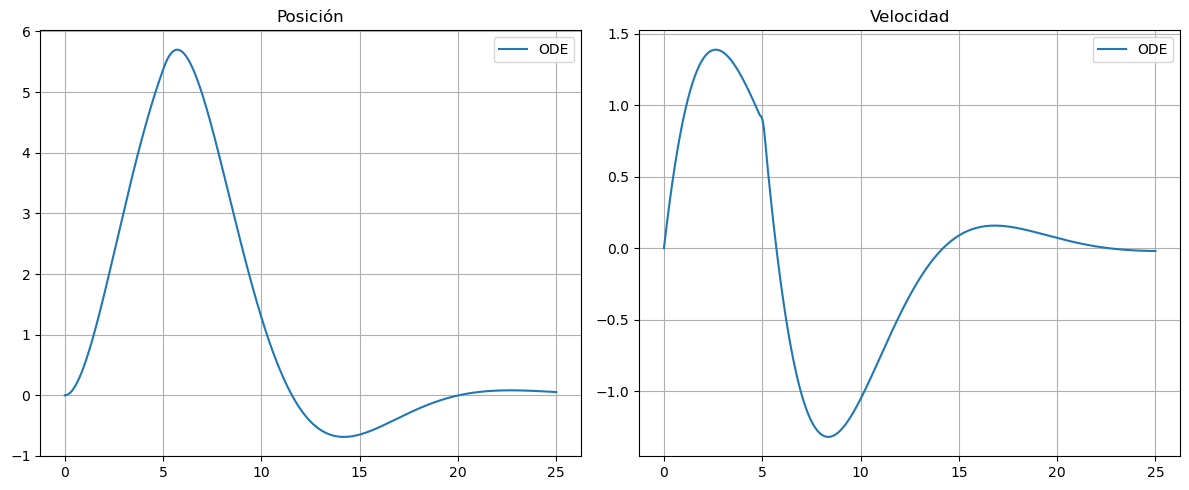

In [2]:
from scipy.integrate import solve_ivp
import numpy as np

def simular_mecanico_ode(m, c, k, F, time):
    """
    Simula el sistema mecánico usando ecuaciones diferenciales (solve_ivp)
    """
    # Interpolación de la fuerza para usarla dentro de la función del sistema
    from scipy.interpolate import interp1d
    F_interp = interp1d(time, F, fill_value="extrapolate")
    
    # Definir el sistema de ecuaciones
    def sistema(t, y):
        x1, x2 = y  # posición y velocidad
        f = F_interp(t)
        dx1_dt = x2
        dx2_dt = (1/m) * (f - c*x2 - k*x1)
        return [dx1_dt, dx2_dt]

    # Condiciones iniciales
    y0 = [0, 0]
    t_span = (time[0], time[-1])

    # Resolver
    sol = solve_ivp(sistema, t_span, y0, t_eval=time)

    return sol.t, sol.y[0], sol.y[1]  # tiempo, posición, velocidad


# Definir parámetros y fuerza
m = 1
c = 0.5
k = 0.2
time = np.arange(0, 25.01, 0.01)
F = np.where(time <= 5, 1.2, 0)

# Llamar a las funciones
t_ode, pos_ode, vel_ode = simular_mecanico_ode(m, c, k, F, time)
#t_tf, pos_tf, vel_tf = simular_mecanico_tf(m, c, k, F, time)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_ode, pos_ode, label='ODE')
#plt.plot(t_tf, pos_tf, '--', label='TF')
plt.title('Posición')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_ode, vel_ode, label='ODE')
#plt.plot(t_tf, vel_tf, '--', label='TF')
plt.title('Velocidad')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
